In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
def get_web(url):
  # Use headers to pass anti-crawler
  headers = requests.utils.default_headers()
  headers.update(
      {
          'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.2 (KHTML, like Gecko) Chrome/22.0.1216.0 Safari/537.2',
      }
  )
  # Get website's information
  response = requests.get(url, headers=headers).text
  soup = BeautifulSoup(response,'lxml')
  song = soup.find_all('tr')
  get_link = []
  get_name = []
  for link in soup.findAll('a'):
    if link.get('href') == None: # pass the None type
      continue
    elif link.get('href')[-4:] == '.wav' or link.get('href')[-4:] == '.mp3': # only download .mp3/.wav
      get_name.append(link.text)
      get_link.append(link.get('href')) # + https://www.pacdv.com/sounds/
  return get_name,get_link,headers

In [3]:
# download sound files
def download(url,file_name,headers):
  file_name = file_name.replace('/','_') + ".wav" # replace '/' otherwise it'll get error
  with open(file_name, "wb") as file:
    response = requests.get('https://www.pacdv.com/sounds/'+url, headers=headers)
    file.write(response.content)

In [4]:
get_name,get_link,headers = get_web('https://www.pacdv.com/sounds/domestic_sounds.html') # website's url

# download all sound files
for i,j in enumerate(get_name):
  download(get_link[i],j,headers)

In [5]:
# mount Google drive
from google.colab import drive
drive.mount('/content/gdrive') # LogIn Google drive
!mv *.wav "./gdrive/MyDrive/pacDV_sound/domestic/" # mv download .wav to google drive dataset path

### Wav Sub-sampling

In [6]:
import os
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

In [7]:
pacDV_path = './gdrive/MyDrive/pacDV_sound/'
for i in os.listdir(pacDV_path):
  for j in os.listdir(pacDV_path + str(i)):
    y, sample_rate = librosa.load(pacDV_path+str(i)+'/'+str(j))
    sf.write('./gdrive/MyDrive/pac_16k/'+i+'/'+j,y,16000,'PCM_16')

In [8]:
y_plot,sr_plot = librosa.load('./gdrive/MyDrive/pacDV_sound/Domestic/Bathroom Faucet.wav')
y_plot_441,sr_plot_441 = librosa.load('./gdrive/MyDrive/pacDV_sound/Domestic/Bathroom Faucet.wav',sr=44100)
y_plot_16,sr_plot_16 = librosa.load('./gdrive/MyDrive/pacDV_sound/Domestic/Bathroom Faucet.wav',sr=16000)

In [227]:
print(sr_plot,sr_plot_16,sr_plot_441)

22050 16000 44100


In [228]:
import librosa.display

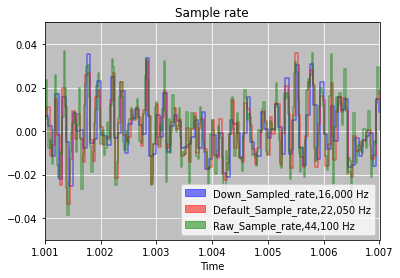

In [235]:
fig, ax = plt.subplots(nrows=1, sharex=True)
ax.set(xlim=[1.001, 1.007], title='Sample rate', ylim=[-0.05, 0.05])
ax.set_facecolor((0.5, 0.5, 0.5, 0.5))
ax.grid(color='white')
librosa.display.waveshow(y_plot_16, sr=sr_plot_16,color='b', alpha=0.5, ax=ax, label='Down_Sampled_rate,16,000 Hz')
librosa.display.waveshow(y_plot, sr=sr_plot, color='r', alpha=0.5, ax=ax, label='Default_Sample_rate,22,050 Hz')
librosa.display.waveshow(y_plot_441, sr=sr_plot_441,color='g', alpha=0.5, ax=ax, label='Raw_Sample_rate,44,100 Hz')
ax.label_outer()
ax.legend()